# <font color='blue'>Kaggle Competition- Predict Stock Price Movement Based On News Headline using NLP
**Credit:** https://www.youtube.com/watch?v=h-LGjJ_oANs&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm&index=13

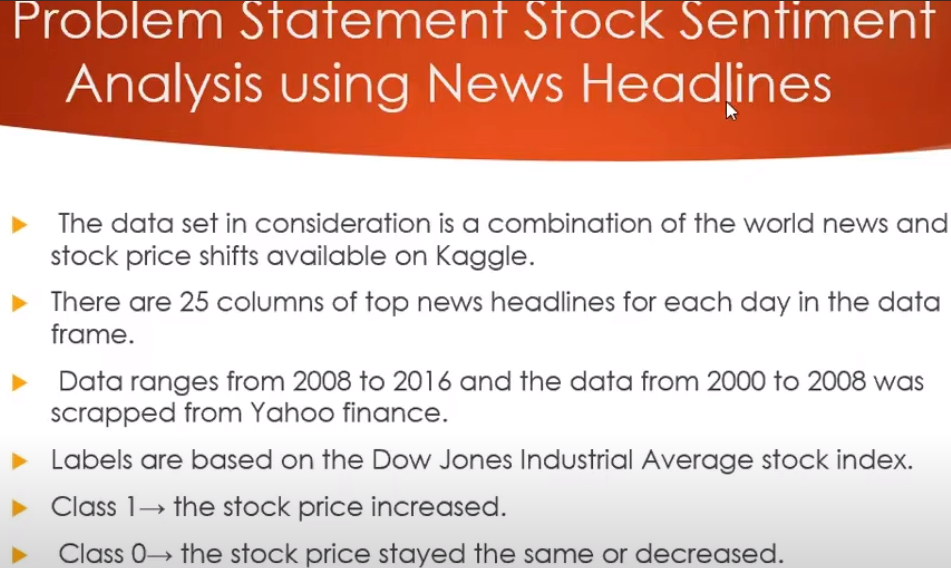